In [1]:
# 大小盘轮动
import pandas as pd
import matplotlib.pyplot as plt
import akshare as ak
import datetime
import glob

In [44]:
sh50_files = sorted(glob.glob("../sh_etf_data/sh510050_daily.tsv"))
sh1000_files =sorted( glob.glob("../sh_etf_data/sh512100_daily.tsv"))
sh50_files

['../sh_etf_data/sh510050_daily.tsv']

In [45]:
# sh50_pd = pd.read_table(sh50_files[0], header=0, index_col=0)
# # for f in sh50_files[1:]:
# #     add_pd = pd.read_table(f, header=0, index_col=0,parse_dates=["day"])
# #     add_pd = add_pd[add_pd["day"] > list(sh50_pd["day"])[-1]] 
# #     sh50_pd = sh50_pd.append(add_pd)
    
# sh1000_pd = pd.read_table(sh1000_files[0], header=0, index_col=0)
# # for f in sh1000_files[1:]:
# #     add_pd = pd.read_table(f, header=0, index_col=0,parse_dates=["day"])
# #     add_pd = add_pd[add_pd["day"] > list(sh1000_pd["day"])[-1]] 
# #     sh1000_pd = sh1000_pd.append(add_pd)
    
# sh50_pd.reset_index(drop=True, inplace=True)
# sh1000_pd.reset_index(drop=True, inplace=True)
sh_pd = ak.stock_zh_index_daily(symbol="sh000001")
sh50_pd = ak.stock_zh_index_daily(symbol="sh000016")
sh1000_pd = ak.stock_zh_index_daily(symbol="sh000852")
sh1000_pd

,date,open,high,low,close,volume
0,2014-10-17,6118.979,6140.119,5943.592,6058.668,9712586400
1,2014-10-20,6068.776,6154.685,6068.517,6154.520,7902498400
2,2014-10-21,6153.020,6176.069,6097.366,6103.008,7954840800
3,2014-10-22,6102.464,6131.886,6024.404,6027.510,7355880000
4,2014-10-23,6009.840,6032.613,5899.890,5930.483,7429696000
...,...,...,...,...,...,...
2026,2023-02-14,7064.529,7070.335,7028.785,7061.449,15178643800
2027,2023-02-15,7062.362,7076.868,7038.986,7063.605,15977932800
2028,2023-02-16,7063.927,7098.918,6878.348,6925.203,21738161700
2029,2023-02-17,6931.993,6954.846,6861.305,6868.548,17265690200


In [46]:
sh_pd["date"][0]

datetime.date(1990, 12, 19)

In [47]:
sh50_pd = sh50_pd[sh50_pd["date"].map(str) >= "2016-11-04"]
sh1000_pd = sh1000_pd[sh1000_pd["date"].map(str) >= "2016-11-04"]
sh_pd = sh_pd[sh_pd["date"].map(str) >= "2022-10-28"]

In [48]:
# sh1000_pd.loc[sh1000_pd["date"].map(str) <"2022-09-05", "close"] *= 2.6895

In [49]:
sh_pd.to_csv("sh_index.csv", sep="\t")

In [50]:
min1_df = sh50_pd[["date", "close", "volume"]]
min2_df = sh1000_pd[["date", "close", "volume"]]
min1_df.rename(columns={"day": "date", "close": "big_close", "volume": "big_vol"}, inplace=True)
min2_df.rename(columns={"day": "date", "close": "small_close", "volume": "small_vol"}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [51]:
min2_df[-95:]

,date,small_close,small_vol
1936,2022-09-26,6283.593,11045349300
1937,2022-09-27,6409.776,10603349400
1938,2022-09-28,6211.109,10496007700
1939,2022-09-29,6228.779,10573074400
1940,2022-09-30,6124.864,9256460000
...,...,...,...
2026,2023-02-14,7061.449,15178643800
2027,2023-02-15,7063.605,15977932800
2028,2023-02-16,6925.203,21738161700
2029,2023-02-17,6868.548,17265690200


In [52]:
import numpy as np
a= np.array(min2_df["small_vol"])
# dates = int(len(a)/48)
# a = a.reshape(dates, 48)
# a.mean()
# avg = np.average(a, axis=0)

meana = a.mean()
min2_df["small_vol_m"] = min2_df["small_vol"]/meana

a= np.array(min1_df["big_vol"])
# dates = int(len(a)/48)
# a = a.reshape(dates, 48)
# a.mean()
# avg = np.average(a, axis=0)

meana = a.mean()
min1_df["big_vol_m"] = min1_df["big_vol"]/meana


/tmp/ipykernel_1123097/1578859314.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min2_df["small_vol_m"] = min2_df["small_vol"]/meana
/tmp/ipykernel_1123097/1578859314.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min1_df["big_vol_m"] = min1_df["big_vol"]/meana


In [53]:
df = pd.merge(left=min1_df[["date", "big_close", "big_vol_m"]],
             right=min2_df[["date", "small_close", "small_vol_m"]],
             left_on=["date"], right_on=["date"])
df["big_amp"] = df["big_close"].pct_change()
df["small_amp"] = df["small_close"].pct_change()

In [54]:
# df['datetime'] = df['date'].apply(lambda x: str(x.to_pydatetime()))
df[-205:]

,date,big_close,big_vol_m,small_close,small_vol_m,big_amp,small_amp
1325,2022-04-18,2887.721,0.883726,6326.025,1.167417,-0.014624,0.008120
1326,2022-04-19,2861.567,0.863306,6345.786,1.108496,-0.009057,0.003124
1327,2022-04-20,2835.352,0.888818,6234.251,1.214363,-0.009161,-0.017576
1328,2022-04-21,2797.529,0.997745,5981.384,1.273830,-0.013340,-0.040561
1329,2022-04-22,2814.127,0.936591,5891.808,1.062872,0.005933,-0.014976
...,...,...,...,...,...,...,...
1525,2023-02-14,2776.982,0.677043,7061.449,1.114700,0.003320,0.001315
1526,2023-02-15,2752.339,0.726367,7063.605,1.173398,-0.008874,0.000305
1527,2023-02-16,2742.804,0.989804,6925.203,1.596422,-0.003464,-0.019594
1528,2023-02-17,2714.289,0.820356,6868.548,1.267970,-0.010396,-0.008181


In [55]:
df["big_cum"] = (df["big_amp"] + 1).cumprod()
df["small_cum"] = (df["small_amp"] + 1).cumprod()

In [56]:
df["big_cum"]

0            NaN
1       1.002213
2       1.004618
3       0.996478
4       1.007713
          ...   
1525    1.222303
1526    1.211456
1527    1.207259
1528    1.194708
1529    1.227327
Name: big_cum, Length: 1530, dtype: float64

In [57]:
2.623/2.393

1.0961136648558296

In [58]:
import math
df["big_small"] = df["big_amp"] - df["small_amp"]
df["big+small"] = abs(df["big_amp"] * df["big_amp"] + df["small_amp"] * df["small_amp"])
df["big+small"] = df["big+small"].map(math.sqrt)
df["big2small"] = df["big_small"]/df["big+small"]

In [59]:
# df["date"][0].to_pydatetime()
df["big2small_roll"] = df["big2small"].rolling(20, min_periods=1).mean()
df["big2small_voll"] = (df["big_vol_m"] - df["small_vol_m"]).rolling(10, min_periods=1).mean() - (df["big_vol_m"] - df["small_vol_m"]).rolling(360, min_periods=1).mean()

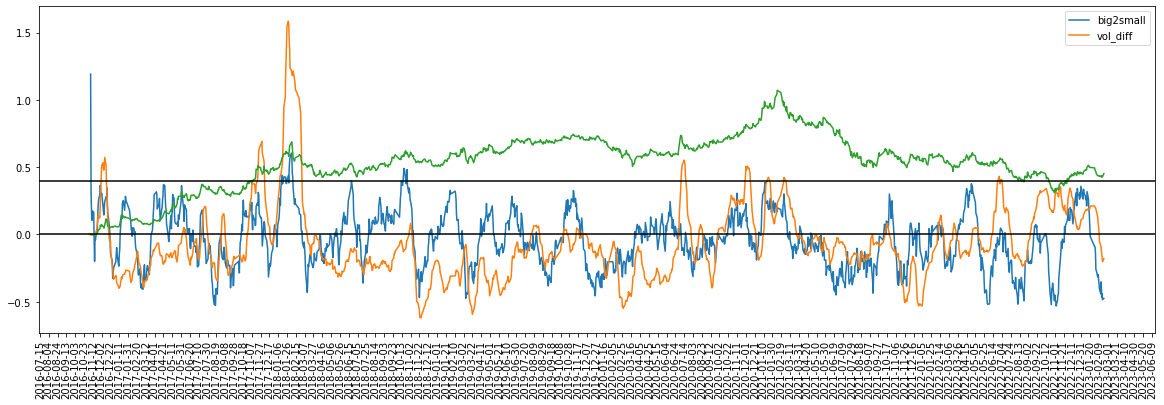

In [65]:
plt.rcParams["figure.figsize"] = (20,6)
df22 = df[:]
import matplotlib.ticker as ticker
fig, ax = plt.subplots(1,1)

ax.plot(df22["date"], df22["big2small_roll"], label=2) 
ax.plot(df22["date"], df22["big2small_voll"] , label=2)
# ax.plot(df22["datetime"], df22["small_vol_m"].rolling(12, min_periods=1).mean(), label=2)
ax.plot(df22["date"], df22["big_cum"] - df22["small_cum"], label=1)
# ax.plot(df22["date"], df22["small_close"], label=2)
# ax.plot(df22["date"], df22["big_close"]  , label=1)


ax.axhline(0, color="black")
ax.axhline(0.4, color="black")
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=20))
ax.legend(["big2small", "vol_diff"])
plt.xticks(rotation=90)
plt.show()


In [61]:
df22

,date,big_close,big_vol_m,small_close,small_vol_m,big_amp,small_amp,big_cum,small_cum,big_small,big+small,big2small,big2small_roll,big2small_voll
0,2016-11-04,2271.926,1.099070,8979.926,0.878742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1,2016-11-07,2276.954,0.788549,8975.566,0.846266,0.002213,-0.000486,1.002213,0.999514,0.002699,0.002266,1.191061,1.191061,0.000000
2,2016-11-08,2282.418,0.989862,9030.731,0.822753,0.002400,0.006146,1.004618,1.005658,-0.003746,0.006598,-0.567814,0.311623,0.000000
3,2016-11-09,2263.924,1.134307,8967.596,1.050328,-0.008103,-0.006991,0.996478,0.998627,-0.001112,0.010702,-0.103877,0.173123,0.000000
4,2016-11-10,2289.449,1.049690,9083.844,1.026373,0.011275,0.012963,1.007713,1.011572,-0.001688,0.017180,-0.098278,0.105273,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,2023-02-14,2776.982,0.677043,7061.449,1.114700,0.003320,0.001315,1.222303,0.786359,0.002005,0.003571,0.561550,-0.352251,-0.107638
1526,2023-02-15,2752.339,0.726367,7063.605,1.173398,-0.008874,0.000305,1.211456,0.786599,-0.009179,0.008879,-1.033794,-0.466049,-0.141434
1527,2023-02-16,2742.804,0.989804,6925.203,1.596422,-0.003464,-0.019594,1.207259,0.771187,0.016129,0.019898,0.810619,-0.440554,-0.180928
1528,2023-02-17,2714.289,0.820356,6868.548,1.267970,-0.010396,-0.008181,1.194708,0.764878,-0.002215,0.013229,-0.167456,-0.484737,-0.202817
